# Quadratic QNMs

### Background

Let us consider wave perturbations to the metric subject to in going and outgoing boundary conditions. To quadratic order we will have solutions to the following equations [from this paper](https://arxiv.org/pdf/2208.07379.pdf):

$$
\mathscr{D} h^{(1)} \sim 0 \quad, \quad \mathscr{D} h^{(2)} \sim h^{(1) 2}
$$

where the first equation is the one that defines the standard set of linear QNMs $\{\omega_I\}$. If we expand the metric:

$$
h = h^{(0)} + \eta h^{(1)} + \eta^2 h^{(2)} + ...
$$

and if $\eta$ is not sufficiently small enough to suppress $h^2$ compared to $h^1$ (I think), then modes that make up $h^{(2)}$ are not ignorable. This set of Quasinormal modes are called the Quadratic Quasinormal Modes or QQNMs 

If we work through the algebra (or look at [point (1.) on pg 2 in this paper](https://arxiv.org/pdf/2208.07379.pdf)) we will find that the set of QQNMs are defined by:

$$
\textrm{QQNMs} := \{ \Re[\omega_I] \pm \Re[\omega_J] + i(\Im[\omega_I] + \Im[\omega_J]) \ \ \forall\ \omega_I, \omega_J \in \textrm{Linear QNMs}\}
$$


# Visualization

#### Initialization

In [1]:
import qnm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


def add_dimensions(x, M, a):
    fref = 2985.668287014743; mref = 68.0;
    
def CalculateColumns(df):
    df['f'] = df['omega_R']/(2*np.pi)
    df['gamma'] = -df['omega_I']
    df['tau'] = 1/df['gamma']
    fref = 2985.668287014743; mref = 68.0;
    f0 = fref*mref/M
    df['f_units'] = f0*df['f']
    df['gamma_units'] = (f0)*df['gamma']
    df['tau_units'] = (1/f0)*df['tau']
    df['tau_units_ms'] = (df['tau_units'])*(10**3)
    df['f_units_Hz'] = (df['f_units'])
    return df
    
def CalculateQNMs(df, a, M):
    get_QNMs = lambda a : (lambda x: x['qnm_object'](a=a)[0])
    df['omega'] = df.apply(get_QNMs(a), axis=1)
    df['omega_R'] = np.real(df['omega'])
    df['omega_I'] = np.imag(df['omega'])
    df = CalculateColumns(df)
    return df.drop('qnm_object', axis=1)

#### Create the list of modes

In [2]:
s = -2;
l_s = [2, 3, 4]
n_s = [0, 1, 2, 3]

modes = [];
for l in l_s:
    for m in range(-l, l+1,1):
        for n in n_s:
            mode_params = {'s':s, 'l': l, 'm': m, 'n': n}
            mode_params.update({'qnm_object': qnm.modes_cache(**mode_params)})
            mode_params.update({'mode': "(" + ",".join([str(val) for val in [l,m,n]]) + ")"})
            modes.append(mode_params)
            
df = pd.DataFrame(modes)

In [3]:
is_corotating = lambda x: x['l'] == x['m']
is_counterrotating = lambda x: x['l'] == -x['m']
is_head_on = lambda x: x['m'] == 0


M = 68;
a = 0.7;
    
all_modes = CalculateQNMs(df, a, M).sort_values('tau', ascending=False)
selected_modes = all_modes.copy()[all_modes.apply(is_corotating, axis=1)]
other_selected_modes = selected_modes.copy()
selected_modes['order'] = 'linear'
other_selected_modes['mode'] = other_selected_modes['mode'].apply(lambda x: x + "*")
other_selected_modes['omega_R'] = -other_selected_modes['omega_R']
other_selected_modes['f'] = -other_selected_modes['f']
other_selected_modes['f_units'] = -other_selected_modes['f_units']
other_selected_modes['f_units_Hz'] = -other_selected_modes['f_units_Hz']
selected_modes = pd.concat([selected_modes, other_selected_modes])

In [14]:
df2 = selected_modes.copy()
make_dicts = lambda a,b: [{'mode': f"{a['mode']} x+ {b['mode']}",
                           'omega_R': a['omega_R'] + b['omega_R'],
                           'omega_I': a['omega_I'] + b['omega_I'],
                           'l1': a['l'], 'l2':b['l'], 
                           'm1': a['m'], 'm2':b['m'],
                           'n1': a['n'], 'n2':b['n']}]

second_order = np.array([[make_dicts(a,b) for i,a in df2.iterrows()] for j,b in df2.copy().iterrows()]).flatten()
second_order = pd.DataFrame(list(second_order))
second_order = CalculateColumns(second_order)

l_condition = ((second_order['l1'] == 2) | (second_order['l2'] == 2))
n_condition = ((second_order['n1'] + second_order['n2'] < 5))
second_order = second_order[l_condition & n_condition]

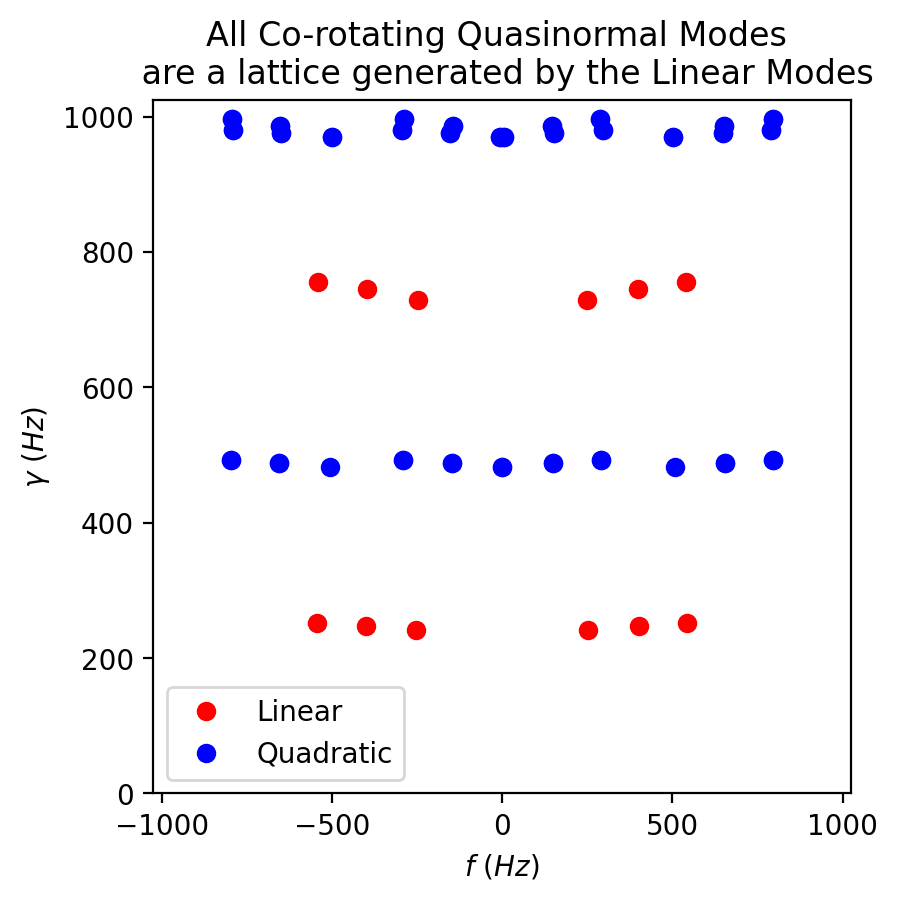

In [18]:
fig, ax = plt.subplots(1, figsize=(4.5,4.5), dpi=200)

col1 = 'f_units'
col2 = 'gamma_units'

ax.plot(selected_modes[col1], selected_modes[col2],'o',c='r', label="Linear")
ax.plot(second_order[col1], second_order[col2],'o',c='b', label="Quadratic")
"""
for i,x in selected_modes.iterrows():
    ax.annotate(f"{x['mode']}",(x[col1]-0.05,x[col2]+0.02), fontsize=8)
for i,x in second_order.iterrows():
    ax.annotate(f"{x['mode']}",(x[col1]-0.05*np.random.rand(),x[col2]+0.02*np.random.rand()), fontsize=4)
"""
ax.set_xlim((-1024,1024))
ax.set_ylim((0,1024))
ax.set_xlabel(r"$f\ (Hz)$")
ax.set_ylabel(r"$\gamma\ (Hz)$")
ax.set_title("All Co-rotating Quasinormal Modes \n are a lattice generated by the Linear Modes")
plt.legend()
plt.show()

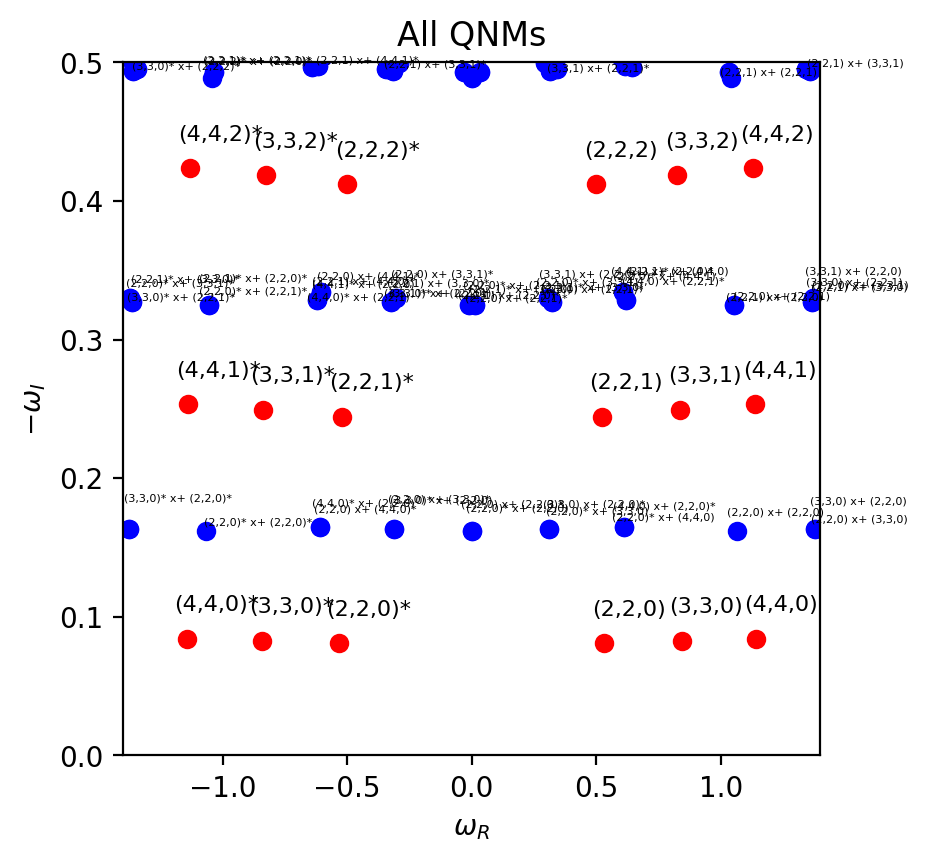

In [16]:
fig, ax = plt.subplots(1, figsize=(4.5,4.5), dpi=200)

col1 = 'omega_R'
col2 = 'gamma'

ax.plot(selected_modes[col1], selected_modes[col2],'o',c='r')
ax.plot(second_order[col1], second_order[col2],'o',c='b')
for i,x in selected_modes.iterrows():
    ax.annotate(f"{x['mode']}",(x[col1]-0.05,x[col2]+0.02), fontsize=8)
for i,x in second_order.iterrows():
    ax.annotate(f"{x['mode']}",(x[col1]-0.05*np.random.rand(),x[col2]+0.02*np.random.rand()), fontsize=4)
ax.set_xlim((-1.4,1.4))
ax.set_ylim((0,0.5))
ax.set_xlabel("$\omega_R$")
ax.set_ylabel("$-\omega_I$")
ax.set_title("All QNMs")
plt.show()

In [11]:
import plotly.express as px
fig = px.bar(x=["a", "b", "c"], y=[1, 3, 2])
fig.show()

In [9]:
!pip install "ipywidgets>=7.6"